File yang terdeteksi di folder /content/sample_data: ['pemakaian_obat_rawat_inap_2023.csv', 'persediaan_farmasi_2023.csv', 'penjualan_obat_rawat_jalan_2023.csv', '.ipynb_checkpoints']
File CSV berhasil dibaca dari folder sample_data.
Kolom tanggal berhasil dikonversi.
Obat di pemakaian_bulanan: ['Amlodipine 5mg', 'Amoxicillin 500mg', 'Cefixime 100mg', 'Ibuprofen 400mg', 'Loratadine 10mg', 'Metformin 500mg', 'Omeprazole 20mg', 'Paracetamol 500mg', 'Salbutamol 2mg', 'Vitamin C 500mg']
Obat di penjualan_bulanan: ['Amlodipine 5mg', 'Amoxicillin 500mg', 'Cefixime 100mg', 'Ibuprofen 400mg', 'Loratadine 10mg', 'Metformin 500mg', 'Omeprazole 20mg', 'Paracetamol 500mg', 'Salbutamol 2mg', 'Vitamin C 500mg']
Obat yang akan divisualisasikan: ['Amlodipine 5mg', 'Amoxicillin 500mg', 'Cefixime 100mg', 'Ibuprofen 400mg', 'Loratadine 10mg', 'Metformin 500mg', 'Omeprazole 20mg', 'Paracetamol 500mg', 'Salbutamol 2mg', 'Vitamin C 500mg']
Obat yang dipilih untuk visualisasi: Amlodipine 5mg


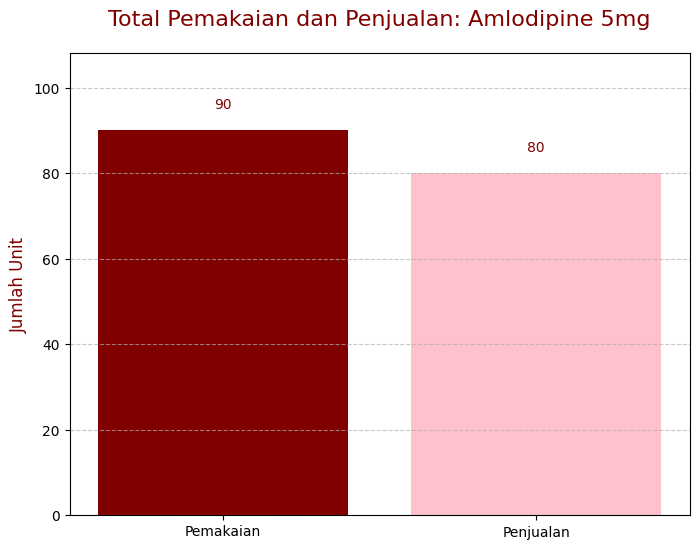

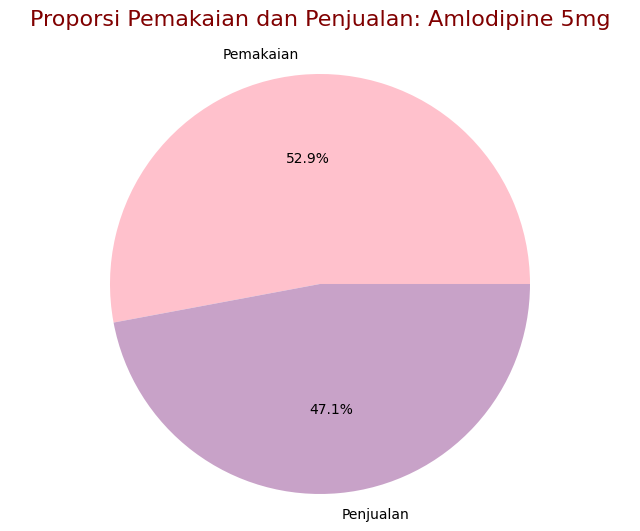

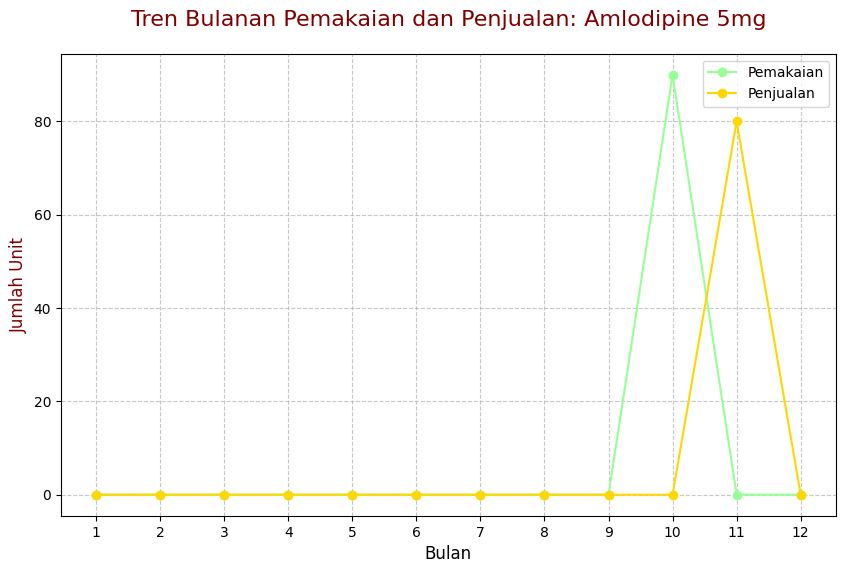

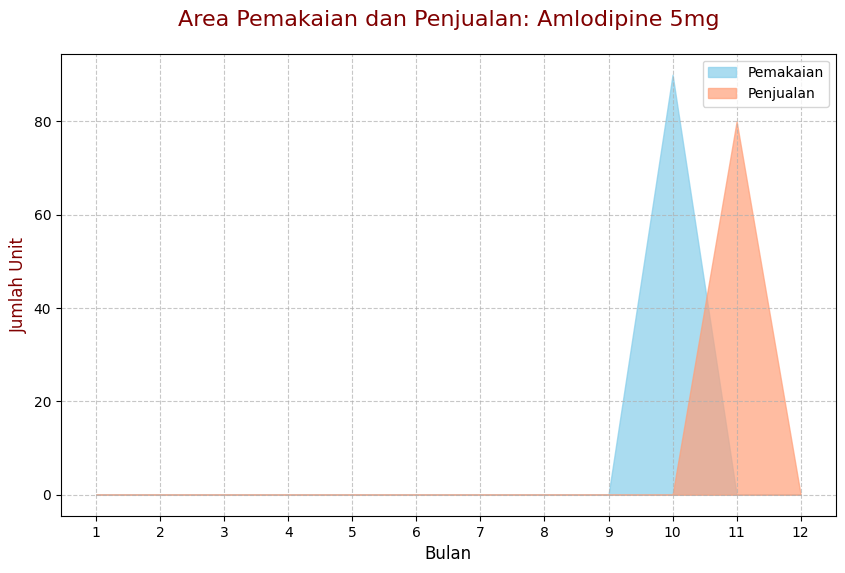

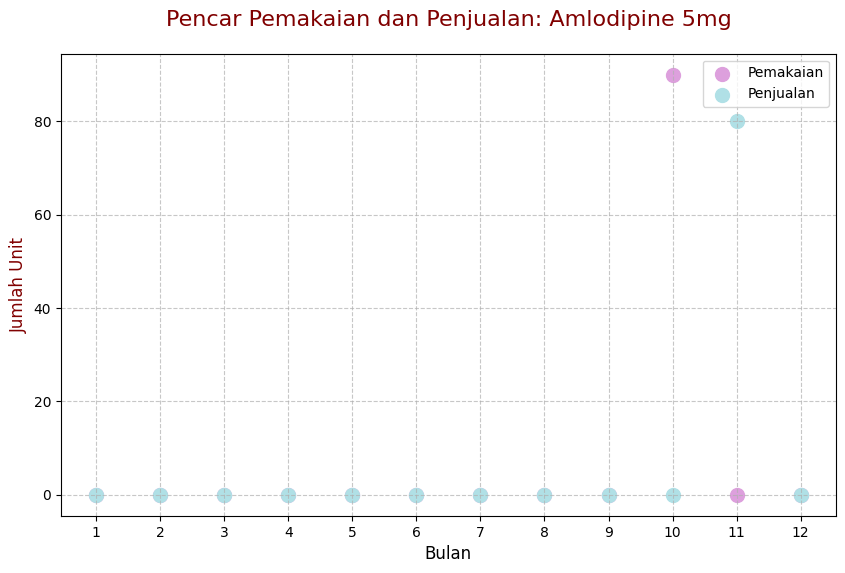

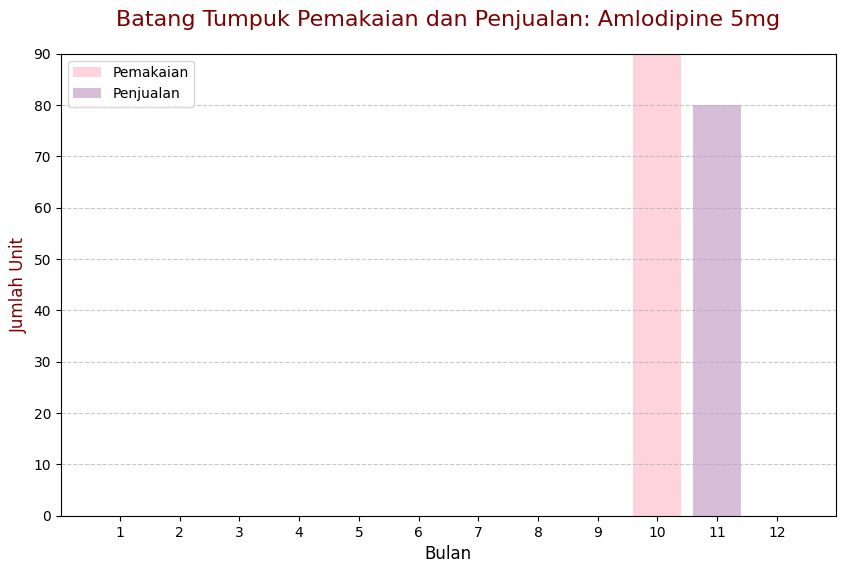

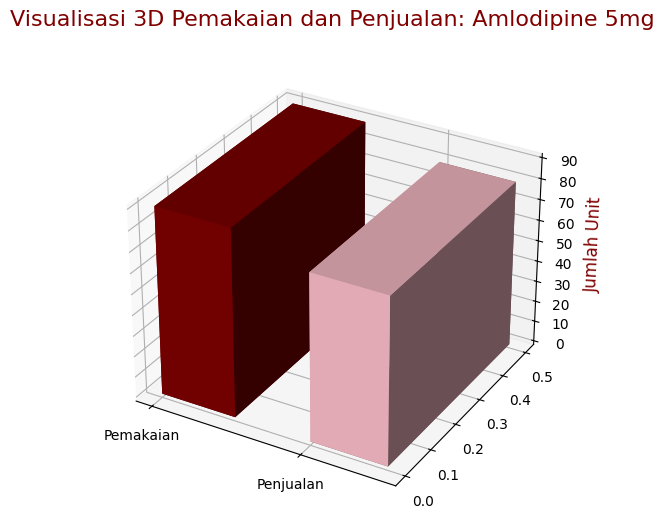

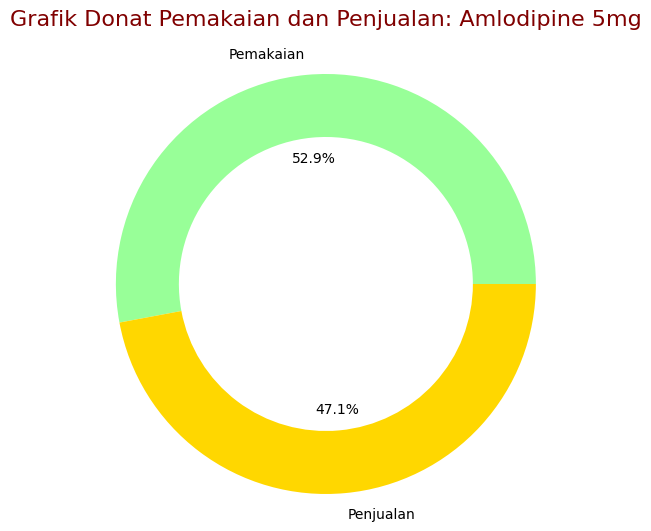

<ipython-input-6-6101964fac8d>:207: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Pemakaian', 'Penjualan'], patch_artist=True, boxprops=dict(facecolor=colors[5]), medianprops=dict(color=colors[0]))


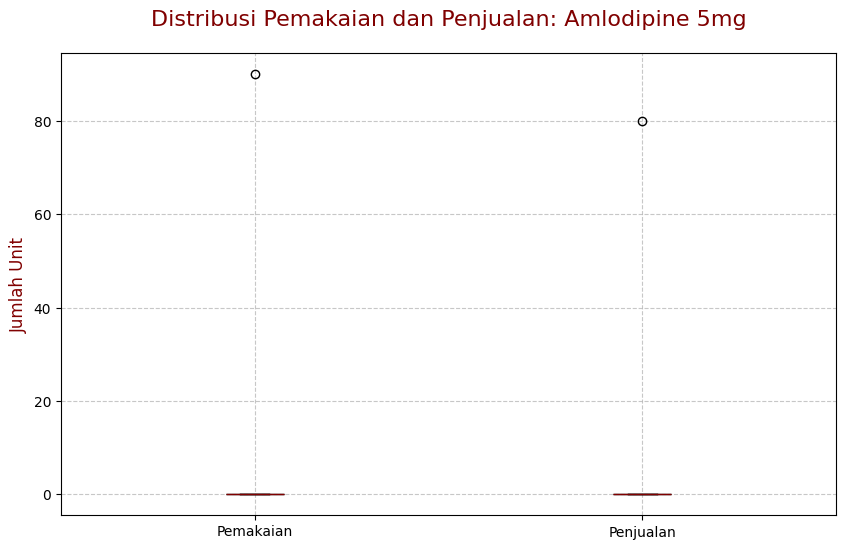

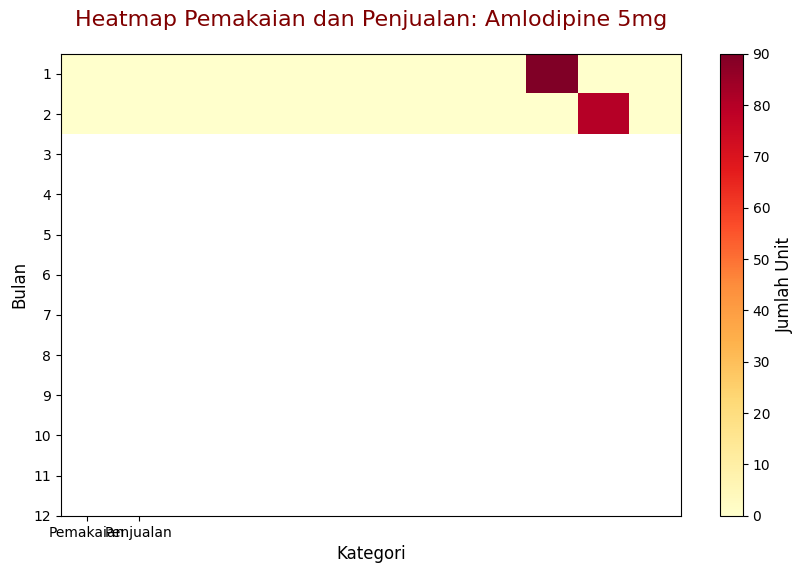

In [ ]:
# Install library dengan mode quiet untuk menghindari pesan "Requirement already satisfied"
!pip install -q pandas matplotlib numpy pillow

# Import library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from matplotlib import rcParams
import os
from mpl_toolkits.mplot3d import Axes3D  # Untuk grafik 3D

# Mengatur gaya visual (tanpa pengaturan font eksplisit untuk menghindari peringatan)
plt.style.use('default')  # Gaya default yang aman
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

# Warna pastel: maroon, pink, ungu, dan lainnya
colors = ['#800000', '#FFC1CC', '#C8A2C8', '#98FF98', '#FFD700', '#87CEEB', '#FFA07A', '#DDA0DD', '#B0E0E6', '#F0E68C']

# Path folder sample_data
folder_path = '/content/sample_data'

# Dapatkan daftar file di folder sample_data
files_in_folder = os.listdir(folder_path)
print(f"File yang terdeteksi di folder {folder_path}: {files_in_folder}")

# Tentukan nama file yang diharapkan
expected_files = {
    'persediaan': 'persediaan_farmasi_2023.csv',
    'pemakaian': 'pemakaian_obat_rawat_inap_2023.csv',
    'penjualan': 'penjualan_obat_rawat_jalan_2023.csv'
}

# Pencocokan nama file
file_mapping = {}
for file_type, expected_name in expected_files.items():
    matched_file = next((f for f in files_in_folder if expected_name in f), None)
    if matched_file:
        file_mapping[file_type] = matched_file
    else:
        print(f"Error: File untuk {file_type} ({expected_name}) tidak ditemukan di folder.")
        raise FileNotFoundError(f"File untuk {file_type} ({expected_name}) tidak ditemukan.")

# Membaca dataset dari file CSV di folder sample_data
try:
    persediaan = pd.read_csv(os.path.join(folder_path, file_mapping['persediaan']))
    pemakaian = pd.read_csv(os.path.join(folder_path, file_mapping['pemakaian']))
    penjualan = pd.read_csv(os.path.join(folder_path, file_mapping['penjualan']))
    print("File CSV berhasil dibaca dari folder sample_data.")
except Exception as e:
    print(f"Error saat membaca file CSV: {e}")
    raise

# Pengecekan kolom yang diperlukan
required_columns_pemakaian = ['Obat', 'Tanggal_Pemakaian', 'Unit']
required_columns_penjualan = ['Obat', 'Tanggal_Penjualan', 'Unit']
for col in required_columns_pemakaian:
    if col not in pemakaian.columns:
        print(f"Error: Kolom '{col}' tidak ditemukan di file {file_mapping['pemakaian']}")
        raise KeyError(f"Kolom '{col}' tidak ditemukan.")
for col in required_columns_penjualan:
    if col not in penjualan.columns:
        print(f"Error: Kolom '{col}' tidak ditemukan di file {file_mapping['penjualan']}")
        raise KeyError(f"Kolom '{col}' tidak ditemukan.")

# Konversi kolom tanggal ke datetime
try:
    pemakaian['Tanggal_Pemakaian'] = pd.to_datetime(pemakaian['Tanggal_Pemakaian'], errors='coerce')
    penjualan['Tanggal_Penjualan'] = pd.to_datetime(penjualan['Tanggal_Penjualan'], errors='coerce')
    print("Kolom tanggal berhasil dikonversi.")
except Exception as e:
    print(f"Error saat mengonversi kolom tanggal: {e}")
    raise

# Pengecekan data tanggal yang tidak valid
if pemakaian['Tanggal_Pemakaian'].isnull().any():
    print("Peringatan: Ada data Tanggal_Pemakaian yang tidak valid (NaT). Silakan periksa file CSV.")
if penjualan['Tanggal_Penjualan'].isnull().any():
    print("Peringatan: Ada data Tanggal_Penjualan yang tidak valid (NaT). Silakan periksa file CSV.")

# Ekstrak bulan dari tanggal
pemakaian['Bulan'] = pemakaian['Tanggal_Pemakaian'].dt.month
penjualan['Bulan'] = penjualan['Tanggal_Penjualan'].dt.month

# Agregasi data pemakaian dan penjualan per bulan
pemakaian_bulanan = pemakaian.groupby(['Bulan', 'Obat'])['Unit'].sum().unstack().fillna(0)
penjualan_bulanan = penjualan.groupby(['Bulan', 'Obat'])['Unit'].sum().unstack().fillna(0)

# Debugging: Tampilkan daftar obat dari kedua tabel
print("Obat di pemakaian_bulanan:", pemakaian_bulanan.columns.tolist())
print("Obat di penjualan_bulanan:", penjualan_bulanan.columns.tolist())

# Gabungkan data untuk visualisasi
obat_list = pemakaian_bulanan.columns.intersection(penjualan_bulanan.columns)
if obat_list.empty:
    print("Error: Tidak ada obat yang sama di kedua tabel. Periksa kolom 'Obat' di file CSV.")
    print("Petunjuk: Bandingkan daftar obat di atas dan pastikan nama obat sama (perhatikan kapitalisasi, spasi, atau kesalahan ketik).")
    raise ValueError("Tidak ada obat yang cocok.")
print(f"Obat yang akan divisualisasikan: {list(obat_list)}")

# Pilih obat pertama untuk visualisasi (bisa diubah manual)
selected_obat = obat_list[0]
print(f"Obat yang dipilih untuk visualisasi: {selected_obat}")

# Agregasi data untuk grafik dengan pengisian data yang hilang
months = range(1, 13)
pemakaian_data = pemakaian_bulanan[selected_obat].reindex(months, fill_value=0).values
penjualan_data = penjualan_bulanan[selected_obat].reindex(months, fill_value=0).values
total_pemakaian = pemakaian_data.sum()
total_penjualan = penjualan_data.sum()

# 1. Grafik Batang (Bar)
plt.figure(figsize=(8, 6))
plt.bar(['Pemakaian', 'Penjualan'], [total_pemakaian, total_penjualan], color=[colors[0], colors[1]])
plt.title(f'Total Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.ylabel('Jumlah Unit', color=colors[0])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(total_pemakaian, total_penjualan) * 1.2)
for i, v in enumerate([total_pemakaian, total_penjualan]):
    plt.text(i, v + 5, str(int(v)), ha='center', color=colors[0])
plt.show()

# 2. Grafik Lingkaran (Pie)
plt.figure(figsize=(8, 6))
plt.pie([total_pemakaian, total_penjualan], labels=['Pemakaian', 'Penjualan'], colors=[colors[1], colors[2]], autopct='%1.1f%%')
plt.title(f'Proporsi Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.axis('equal')
plt.show()

# 3. Grafik Garis (Line)
plt.figure(figsize=(10, 6))
plt.plot(months, pemakaian_data, label='Pemakaian', color=colors[3], marker='o')
plt.plot(months, penjualan_data, label='Penjualan', color=colors[4], marker='o')
plt.title(f'Tren Bulanan Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Unit', color=colors[0])
plt.xticks(months)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 4. Grafik Area (Area)
plt.figure(figsize=(10, 6))
plt.fill_between(months, pemakaian_data, label='Pemakaian', color=colors[5], alpha=0.7)
plt.fill_between(months, penjualan_data, label='Penjualan', color=colors[6], alpha=0.7)
plt.title(f'Area Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Unit', color=colors[0])
plt.xticks(months)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Grafik Scatter
plt.figure(figsize=(10, 6))
plt.scatter(months, pemakaian_data, label='Pemakaian', color=colors[7], s=100)
plt.scatter(months, penjualan_data, label='Penjualan', color=colors[8], s=100)
plt.title(f'Pencar Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Unit', color=colors[0])
plt.xticks(months)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 6. Grafik Batang Tumpuk (Stacked Bar)
plt.figure(figsize=(10, 6))
plt.bar(months, pemakaian_data, label='Pemakaian', color=colors[1], alpha=0.7)
plt.bar(months, penjualan_data, label='Penjualan', color=colors[2], alpha=0.7, bottom=pemakaian_data)
plt.title(f'Batang Tumpuk Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Unit', color=colors[0])
plt.xticks(months)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Grafik Batang 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = np.array([0, 1])
y = np.array([0, 0])
z = np.zeros(2)
dx = np.ones(2) * 0.5
dy = np.ones(2) * 0.5
dz = np.array([total_pemakaian, total_penjualan])
ax.bar3d(x, y, z, dx, dy, dz, color=[colors[0], colors[1]])
ax.set_title(f'Visualisasi 3D Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Pemakaian', 'Penjualan'])
ax.set_zlabel('Jumlah Unit', color=colors[0])
plt.show()

# 8. Grafik Donat (Doughnut)
plt.figure(figsize=(8, 6))
plt.pie([total_pemakaian, total_penjualan], labels=['Pemakaian', 'Penjualan'], colors=[colors[3], colors[4]], autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title(f'Grafik Donat Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.axis('equal')
plt.show()

# 9. Grafik Box Plot
data = [pemakaian_data, penjualan_data]
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Pemakaian', 'Penjualan'], patch_artist=True, boxprops=dict(facecolor=colors[5]), medianprops=dict(color=colors[0]))
plt.title(f'Distribusi Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.ylabel('Jumlah Unit', color=colors[0])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 10. Grafik Heatmap
data_matrix = np.vstack((pemakaian_data, penjualan_data))
plt.figure(figsize=(10, 6))
plt.imshow(data_matrix, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Jumlah Unit')
plt.xticks([0, 1], ['Pemakaian', 'Penjualan'])
plt.yticks(range(12), months)
plt.title(f'Heatmap Pemakaian dan Penjualan: {selected_obat}', color=colors[0], pad=20)
plt.xlabel('Kategori')
plt.ylabel('Bulan')
plt.show()